In [2]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import statistics


In [4]:
df_Fallout4 = pd.read_csv("./datasets/377160.csv")
df_Fallout4['Date']= pd.to_datetime(df_Fallout4['Time'])#.dt.date
df_Fallout4.head()

,Time,Playercount,Date
0,2017-12-14 00:00,17909.0,2017-12-14 00:00:00
1,2017-12-14 00:05,17685.0,2017-12-14 00:05:00
2,2017-12-14 00:10,17724.0,2017-12-14 00:10:00
3,2017-12-14 00:15,17672.0,2017-12-14 00:15:00
4,2017-12-14 00:20,17636.0,2017-12-14 00:20:00


<AxesSubplot:xlabel='Date', ylabel='Playercount'>

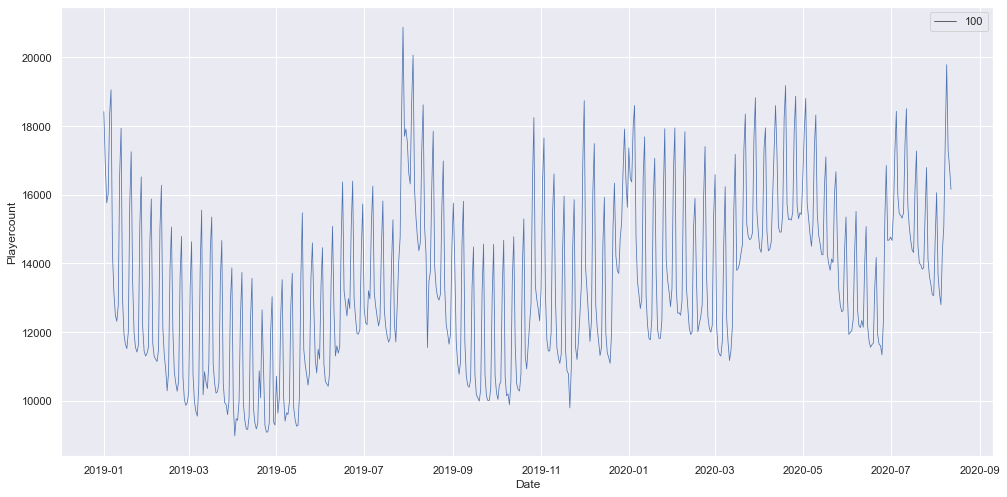

In [5]:
sns.set(rc={'figure.figsize':(16.7,8.27)})
startDate_pre = "2019-01-01 00:00:00"
endDate_pand = "2020-08-31 00:00:00"
df_Fallout4 = df_Fallout4[(df_Fallout4.Date >= startDate_pre) & (df_Fallout4.Date <= endDate_pand)]
df_Fallout4['Date'] = pd.to_datetime(df_Fallout4['Date']).dt.date
df_tmp = df_Fallout4.groupby('Date').mean()
sns.lineplot(data=df_tmp, x="Date", y="Playercount", size = 100)

<AxesSubplot:xlabel='Date', ylabel='Playercount'>

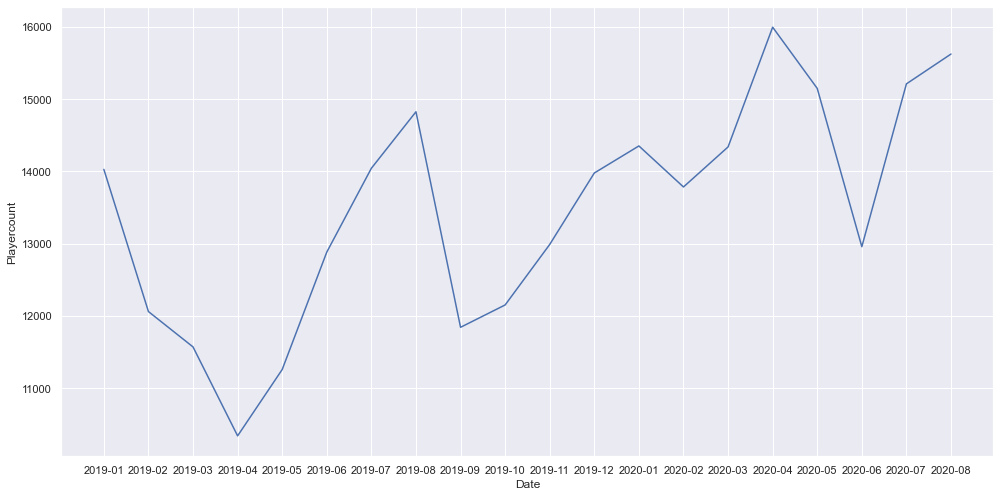

In [6]:
df_Fallout4['Date'] = df_Fallout4['Date'].apply(lambda x: x.strftime('%Y-%m'))
df_tmp = df_Fallout4.groupby('Date').mean()
sns.lineplot(data=df_tmp, x="Date", y="Playercount")

We first found the top 5 single player and top 5 multiplayer games along with their corresponding game IDs.

Top 5 single player games:

| Game      | Game ID |
| ----------- | ----------- |
| Fallout 4   | 377160       |
| The Elder Scrolls V: Skyrim Special Edition   | 489830        |
| Cities: Skylines  | 255710       |
| The Binding of Isaac: Rebirth   | 250900        |
| Subnautica   | 264710       |

Top 5 multi-player games:

| Game      | Game ID |
| ----------- | ----------- |
| Csgo   | 730       |
| Dota 2   | 570        |
| Pubg  | 578080       |
| Rust   | 252490        |
| GTA V   | 271590       |


# Top 5 Single Player Game EDA (Testing)

In [70]:
single_player_IDs = [377160, 489830, 255710, 250900, 264710]
game_ID_dict = {377160:'Fallout 4',
                489830: 'The Elder Scrolls V: Skyrim Special Edition',
                255710: 'Cities: Skylines',
                250900: 'The Binding of Isaac: Rebirth',
                264710: 'Subnautica'}

In [74]:
# Read from start date to end date, and average 
def plotGame(ID, startDate, endDate, y_values_dict):
    df = pd.read_csv("./datasets/"+str(ID)+".csv")
    df['Date']= pd.to_datetime(df['Time'])
    df = df[(df.Date >= startDate) & (df.Date <= endDate)]
    df['Date'] = pd.to_datetime(df['Date']).dt.date
    df['Date'] = df['Date'].apply(lambda x: x.strftime('%Y-%m'))
    df_tmp = df.groupby('Date').mean()
    df_tmp = df_tmp.reset_index()
    dates = list(df_tmp['Date']) # find a way to do collect dates once. this is repetitive and dates is constat
    y_values_dict.setdefault(ID, list(df_tmp['Playercount']))
    return dates

# Range 1: [Nov 2019, Dec 2019, Jan 2020, Feb 2020]
range_1_start_date = "2019-11-01 00:00:00"
range_1_end_date   = "2020-02-01 00:00:00"

# Range 2: [March 2020, April 2020, May 2020, June 2020]
range_2_start_date = "2020-03-01 00:00:00"
range_2_end_date   = "2020-06-01 00:00:00"

# Range 3 (total range): [Nov 2019, ..., June 2020]
range_3_start_date = "2019-11-01 00:00:00"
range_3_end_date   = "2020-06-01 00:00:00"

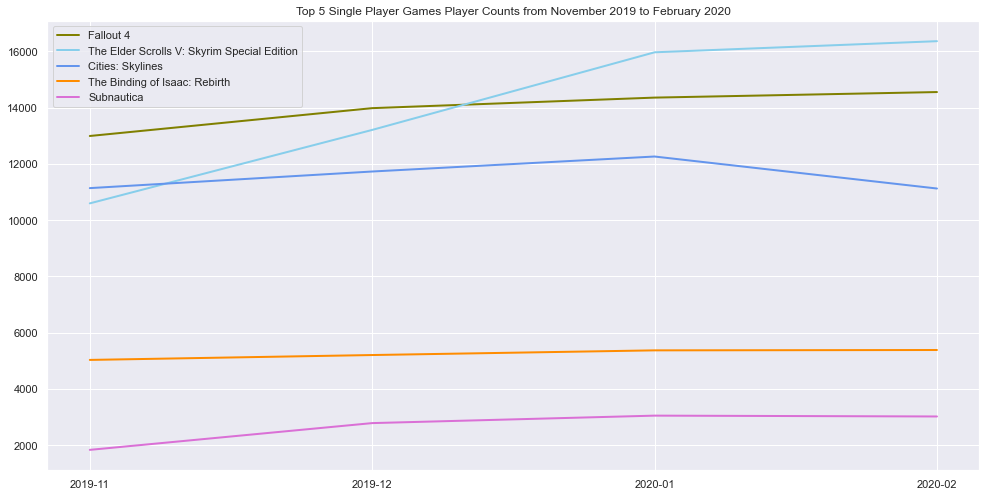

In [75]:
# Range 1 Line Plot
pre_y_values_dict = {} # Collect all y-values for each game

for single_player_game in single_player_IDs:
    dates = plotGame(single_player_game, range_1_start_date, range_1_end_date, pre_y_values_dict)

# Merge all games into one dataframe
prepandemic_games_df =pd.DataFrame({ 'Date': dates , 
                                       game_ID_dict[377160]: pre_y_values_dict[377160],
                                       game_ID_dict[489830]: pre_y_values_dict[489830], 
                                       game_ID_dict[255710]: pre_y_values_dict[255710],
                                       game_ID_dict[250900]: pre_y_values_dict[250900],
                                       game_ID_dict[264710]: pre_y_values_dict[264710]})

# Plot each game's player count history
plt.plot( 'Date', game_ID_dict[377160], data=prepandemic_games_df, marker='', color='olive', linewidth=2)
plt.plot( 'Date', game_ID_dict[489830], data=prepandemic_games_df, marker='', color='skyblue', linewidth=2) 
plt.plot( 'Date', game_ID_dict[255710], data=prepandemic_games_df, marker='', color='cornflowerblue', linewidth=2)
plt.plot( 'Date', game_ID_dict[250900], data=prepandemic_games_df, marker='', color='darkorange', linewidth=2)
plt.plot( 'Date', game_ID_dict[264710], data=prepandemic_games_df, marker='', color='orchid', linewidth=2)
plt.title('Top 5 Single Player Games Player Counts from November 2019 to February 2020')
plt.legend()

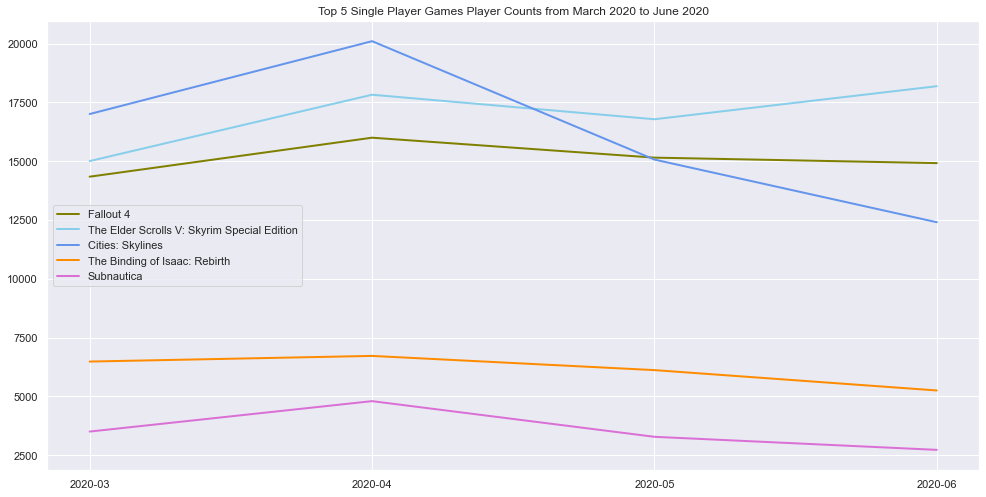

In [76]:
# Range 2 Line Plot
pandemic_y_values_dict = {} # Collect all y-values for each game

for single_player_game in single_player_IDs:
    dates = plotGame(single_player_game, range_2_start_date, range_2_end_date, pandemic_y_values_dict)

# Merge all games into one dataframe (loop thorough dict keys with same key value -> concat to one df )
pandemic_games_df =pd.DataFrame({ 'Date': dates , 
                                  game_ID_dict[377160]: pandemic_y_values_dict[377160],
                                  game_ID_dict[489830]: pandemic_y_values_dict[489830], 
                                  game_ID_dict[255710]: pandemic_y_values_dict[255710],
                                  game_ID_dict[250900]: pandemic_y_values_dict[250900],
                                  game_ID_dict[264710]: pandemic_y_values_dict[264710]})
# Plot each game's player count history
plt.plot( 'Date', game_ID_dict[377160], data=pandemic_games_df, marker='', color='olive', linewidth=2)
plt.plot( 'Date', game_ID_dict[489830], data=pandemic_games_df, marker='', color='skyblue', linewidth=2) 
plt.plot( 'Date', game_ID_dict[255710], data=pandemic_games_df, marker='', color='cornflowerblue', linewidth=2)
plt.plot( 'Date', game_ID_dict[250900], data=pandemic_games_df, marker='', color='darkorange', linewidth=2)
plt.plot( 'Date', game_ID_dict[264710], data=pandemic_games_df, marker='', color='orchid', linewidth=2)
plt.title('Top 5 Single Player Games Player Counts from March 2020 to June 2020')
plt.legend()

## Top 5 Single Player Games Player Count EDA (For checkpoint)

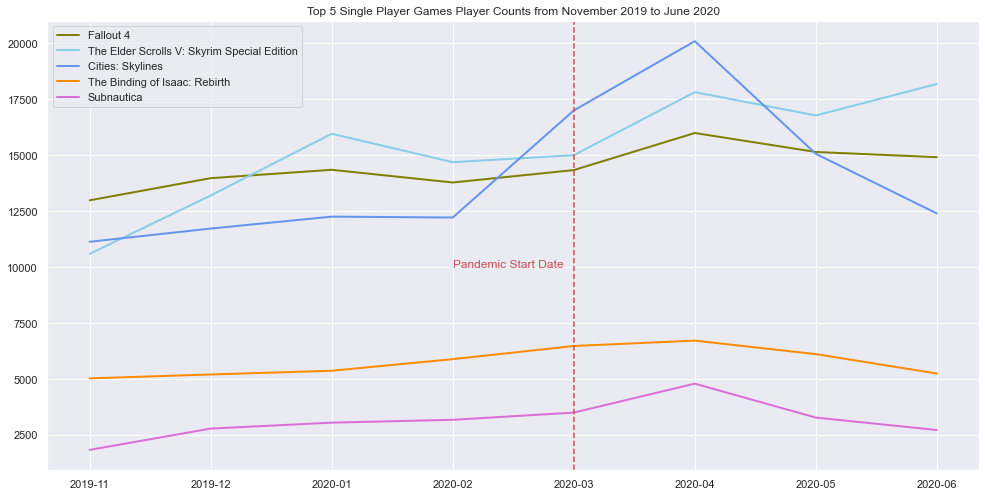

In [69]:
# Range 3 Line Plot
y_values_dict = {}
for single_player_game in single_player_IDs:
    all_dates = plotGame(single_player_game, range_3_start_date, range_3_end_date)

# Merge all games into one dataframe
all_games_df =pd.DataFrame({ 'Date': all_dates, 
                                  game_ID_dict[377160]: y_values_dict[377160],
                                  game_ID_dict[489830]: y_values_dict[489830], 
                                  game_ID_dict[255710]: y_values_dict[255710],
                                  game_ID_dict[250900]: y_values_dict[250900],
                                  game_ID_dict[264710]: y_values_dict[264710]})
# Plot each game's player count history (loop)
plt.plot( 'Date', game_ID_dict[377160], data=all_games_df, marker='', color='olive', linewidth=2)
plt.plot( 'Date', game_ID_dict[489830], data=all_games_df, marker='', color='skyblue', linewidth=2) 
plt.plot( 'Date', game_ID_dict[255710], data=all_games_df, marker='', color='cornflowerblue', linewidth=2)
plt.plot( 'Date', game_ID_dict[250900], data=all_games_df, marker='', color='darkorange', linewidth=2)
plt.plot( 'Date', game_ID_dict[264710], data=all_games_df, marker='', color='orchid', linewidth=2)
plt.title('Top 5 Single Player Games Player Counts from November 2019 to June 2020')
plt.axvline(x='2020-03', linestyle='--', color = 'r')
plt.text(3,10000,'Pandemic Start Date',color='r',fontsize=12)
plt.legend()

In [22]:
prepandemic_games_df.head()

,Date,Fallout 4,The Elder Scrolls V: Skyrim Special Edition,Cities: Skylines,The Binding of Isaac: Rebirth,Subnautica
0,2019-11,12988.796747,10594.386614,11136.069446,5030.849112,1834.356646
1,2019-12,13977.968119,13204.475918,11726.328410,5204.428636,2785.450720
2,2020-01,14352.666967,15962.667343,12259.036214,5370.728148,3050.902126
3,2020-02,14550.000000,16358.000000,11122.000000,5383.000000,3021.000000


## Bar Plot Showing Percent Change of Player Counts before and during Pandemic

In [103]:
def findPercentIncrease(gameID):
    # Find average of player counts from November 2019 to February 2020 for each game
    pre_game = statistics.mean(pre_y_values_dict[gameID])
    # Find average of player counts from March 2020 to June 2020 for each game
    post_game = statistics.mean(pandemic_y_values_dict[gameID])
    perc_increase = (post_game - pre_game) / pre_game * 100
    return perc_increase


In [104]:
'''
game_ID_dict = {377160:'Fallout 4',
                489830: 'The Elder Scrolls V: Skyrim Special Edition',
                255710: 'Cities: Skylines',
                250900: 'The Binding of Isaac: Rebirth',
                264710: 'Subnautica'}
'''
# Find percent change for each game (apply function on column)
perc_fallout = findPercentIncrease(377160)
perc_elder_scrolls = findPercentIncrease(489830)
perc_cities_skylines = findPercentIncrease(255710) 
perc_binding_isaac = findPercentIncrease(250900) 
perc_subnautica = findPercentIncrease(264710) 
games_and_perc = {'Game': ['Fallout 4',
                           'The Elder Scrolls V: Skyrim Special Edition',
                           'Cities: Skylines','The Binding of Isaac: Rebirth',
                           'Subnautica'],
                  'Percent Increase in Player Counts': [perc_fallout, 
                            perc_elder_scrolls, 
                            perc_cities_skylines, 
                            perc_binding_isaac, 
                            perc_subnautica] }

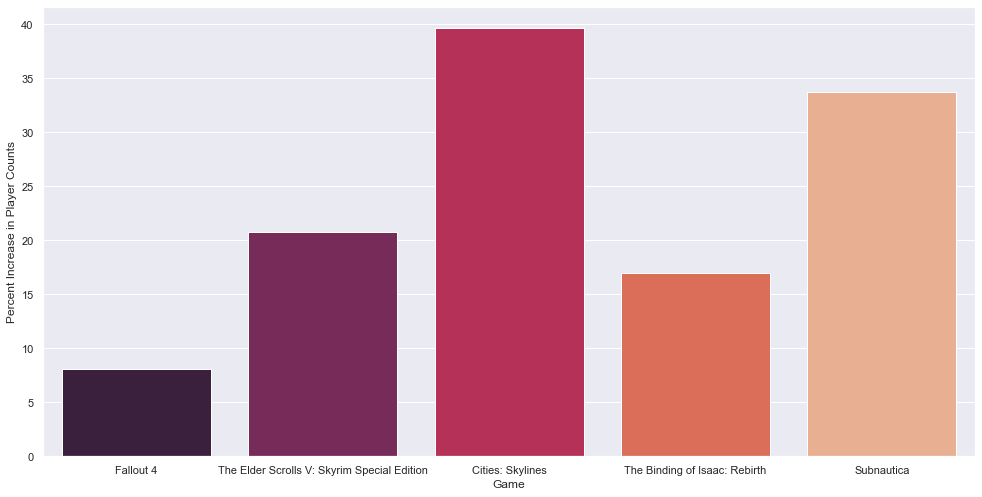

In [105]:
perc_change = pd.DataFrame(games_and_perc, columns=['Game','Percent Increase in Player Counts'])
ax = sns.barplot(x="Game", y="Percent Increase in Player Counts", data=perc_change, palette='rocket')

In [ ]:
# NOTE games on sale may be confounders

# Generalizing to All Games

In [5]:
# Load in combined_reduced data 
combined_reduced_df = pd.read_csv('./datasets/combinedReduced.csv')
combined_reduced_df.head()

,ID,name,releasedate,Asynchronous Multiplayer,Co-op,Co-op Campaign,Competitive,Local Co-Op,Local Multiplayer,Multiplayer,Online Co-Op,Party-Based RPG,PvE,PvP,Replay Value,Singleplayer,free_to_play,Casual,RPG,Massively_Multiplayer
0,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21 00:00:00,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
1,570,Dota 2,2013-07-09 00:00:00,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,730,Counter-Strike: Global Offensive,2012-08-21 00:00:00,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0
3,359550,Tom Clancy's Rainbow Six Siege,2015-12-01 00:00:00,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1
4,271590,Grand Theft Auto V,2015-04-13 00:00:00,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [25]:
'''
# Load all IDs into a list
all_IDs = combined_reduced_df['ID'].tolist()
all_games = combined_reduced_df['name'].tolist()
# Map IDs to their game names
all_games_ID_dict = pd.Series(combined_reduced_df.name.values, 
          index=combined_reduced_df.ID).to_dict()
'''

# Range 1: [Nov 2019, Dec 2019, Jan 2020, Feb 2020]
range_1_start_date = "2019-11-01 00:00:00"
range_1_end_date   = "2020-02-01 00:00:00"

# Range 2: [March 2020, April 2020, May 2020, June 2020]
range_2_start_date = "2020-03-01 00:00:00"
range_2_end_date   = "2020-06-01 00:00:00"

# Range 3 (total range): [Nov 2019, ..., June 2020]
# range_3_start_date = "2019-11-01 00:00:00"
# range_3_end_date   = "2020-06-01 00:00:00"

In [22]:
'''
Input: Game ID  
Output: Percent increase of player counts from 4 months before and 4 months after the pandemic
'''
def findPercentIncrease(gameID):
    # (1) Find player counts for 4 months before pandemic
    pre_y_values_dict = {}
    plotGame(gameID, range_1_start_date, range_1_end_date, pre_y_values_dict) 
    # (2) Find player counts for 4 months after pandemic
    pandemic_y_values_dict = {}  
    plotGame(gameID, range_2_start_date, range_2_end_date, pandemic_y_values_dict)   
    # (3) Find average of player counts from November 2019 to February 2020 for each game
    pre_game = statistics.mean(pre_y_values_dict[gameID])
    # (4) Find average of player counts from March 2020 to June 2020 for each game
    post_game = statistics.mean(pandemic_y_values_dict[gameID])
    perc_increase = (post_game - pre_game) / pre_game * 100
    return perc_increase

In [23]:
def plotGame(ID, startDate, endDate, y_values_dict):
    df = pd.read_csv("./datasets/"+str(ID)+".csv")
    df['Date']= pd.to_datetime(df['Time'])
    df = df[(df.Date >= startDate) & (df.Date <= endDate)]
    df['Date'] = pd.to_datetime(df['Date']).dt.date
    df['Date'] = df['Date'].apply(lambda x: x.strftime('%Y-%m'))
    df_tmp = df.groupby('Date').mean()
    df_tmp = df_tmp.reset_index()
    # dates = list(df_tmp['Date']) # find a way to do collect dates once. this is repetitive and dates is constant
    y_values_dict.setdefault(ID, list(df_tmp['Playercount']))
    # return dates

In [24]:
# Find percent increase for all games and add to new 'Percent Increase' column of dataframe
combined_reduced_df['Percent Increase'] = combined_reduced_df['ID'].apply(lambda thisID : findPercentIncrease(thisID))


FileNotFoundError: [Errno 2] No such file or directory: './datasets/578080.csv'